# Random Forest for classifying actor

In [55]:
# Importing the needed library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

### Importing the dataset

In [12]:
data = pd.read_csv('train.csv')
# Dataset contains no null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

In [3]:
# How the dataset is formed
data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


### Changing the lead value from female/male (Categorical) to numerical

In [13]:
numerical_data = {'Lead':{'Female': 1, 'Male': 0}}
data = data.replace(numerical_data)
data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,1
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,0
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,0
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,0
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,0


### Train the model

In [30]:
# Import the needed the library
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Get random state
random_int = random.Random().randint(0, 99999)
x = data.drop(['Lead'], axis=1)
y = data['Lead']
x_train, x_test, y_train, y_test = \
train_test_split(x, y, random_state=random_int, shuffle = True, test_size=0.20)

# Create the model for random forest
ran_int = random.Random().randint(0, 99999)

# Create the models
random_forest = RandomForestClassifier()
classification_tree = DecisionTreeClassifier(max_depth=8)
bagging = BaggingClassifier()

# Fit the model
random_forest.fit(x_train, y_train)
classification_tree.fit(x_train, y_train)
bagging.fit(x_train, y_train)

# Accuracy
acc_random_forest = random_forest.score(x_test, y_test)
acc_classification_tree = classification_tree.score(x_test, y_test)
acc_bagging = bagging.score(x_test, y_test)

print(f'The accuracy Random Forest {acc_random_forest}')
print(f'The accuracy Classificaton tree: {acc_classification_tree}')
print(f'The accuracy Bagging: {acc_bagging}')

The accuracy Random Forest 0.8221153846153846
The accuracy Classificaton tree: 0.8125
The accuracy Bagging: 0.8173076923076923


### Cross validation before tuning
With Cross validation we can compute E_new which describes how well the model generalizes from the training data to new situations.

In [8]:
from sklearn.model_selection import cross_val_score

# TODO: Check the cross fold
random_forest_cv_score = cross_val_score(random_forest, x, y, cv=10)
print(f'Cross validation for random forest {random_forest_cv_score.mean()}')

classification_tree_cv_score = cross_val_score(classification_tree, x, y, cv=10)
print(f'Cross validation for classifiction tree {classification_tree_cv_score.mean()}')

bagging_cv_score = cross_val_score(bagging, x, y, cv=10)
print(f'Cross validation for bagging is {bagging_cv_score.mean()}')

Cross validation for random forest 0.8498506348020911
Cross validation for classifiction tree 0.8026325616131442
Cross validation for bagging is 0.8228808812546676


### Features Importance

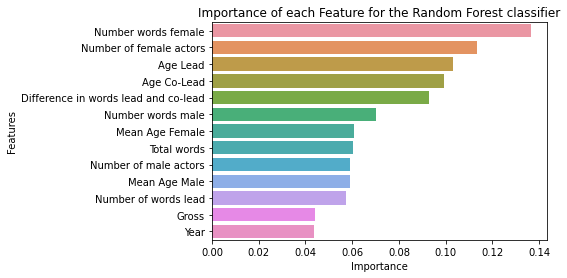

In [16]:
import seaborn as sns
feature_score = \
pd.Series(random_forest.feature_importances_, index=x_train.columns)\
.sort_values(ascending=False)
    
sns.barplot(x=feature_score, y=feature_score.index, )
plt.title("Importance of each Feature for the Random Forest classifier")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Find best subset

In [208]:
from itertools import chain, combinations
def find_best_subset(estimator, X, y, max_size=14, cv=5, print_progress=False):
    """
    Calculates the best model of up to max_size features of X.
    estimator must have a fit and score functions.
    X must be a DataFrame.
    Source of function: https://stackoverflow.com/a/50704252/6400551
    """

    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1)
               for k in range(min(n_features, max_size)))

    subsets_2 = (combinations(range(n_features), k + 1)
                 for k in range(min(n_features, max_size)))

    best_size_subset = []

    progress_percentage = 0
    progress = 0
    # total_combinations = sum(math.comb(n_features, size) for size in range(max_size + 1))
    total_combinations = 0

    for subsets_k in subsets_2:
        for subset in subsets_k:
            total_combinations += 1

    if print_progress:
        print(f"Looking through {total_combinations} combinations...")

    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None

        for subset in subsets_k:
            if print_progress:
                progress += 1

                percentage = 100.0 * (progress / float(total_combinations))
                percentage_int = int(percentage)

                if percentage_int > progress_percentage:
                    progress_percentage = percentage_int
                    print(f"Progress: {progress_percentage}%")

            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size
            score = estimator.score(X.iloc[:, list(subset)], y)
            if score > best_score:
                best_score, best_subset = score, subset

        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)

    # compare best subsets of each size
    best_score = -np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        score = cross_val_score(estimator, X.iloc[:, list(subset)], y, cv=cv).mean()
        list_scores.append(score)
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score, best_size_subset, list_scores
best_subset, best_score, best_size_subset, list_score = find_best_subset(random_forest, x, y)

In [209]:
print(f'Best subset {best_subset}')
print(f'Best score {best_score}')
print(f' Best size subset {best_size_subset}')
print(f'List score {list_score}')

Best subset (0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)
Best score 0.847942214790041
 Best size subset [(3,), (3, 6), (0, 3, 6), (3, 6, 10, 11), (2, 3, 6, 11, 12), (1, 2, 3, 6, 11, 12), (0, 2, 3, 6, 8, 11, 12), (0, 1, 2, 3, 6, 8, 11, 12), (0, 1, 2, 3, 6, 8, 9, 11, 12), (0, 2, 3, 4, 6, 7, 8, 9, 11, 12), (0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]
List score [0.7102889260497955, 0.7073996655518394, 0.8055648457822372, 0.775710702341137, 0.7815124489037533, 0.7767001114827201, 0.8180973615756224, 0.8200204384986994, 0.815194165737644, 0.8479282794500186, 0.847942214790041, 0.8161742846525455, 0.8363851727982162]


In [21]:
# Feature importance for random forest

label_name = []
for name, index in zip(data.columns, range(14)):
    print(f' {index} = {name} ')
# Best subset (0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)

 0 = Number words female 
 1 = Total words 
 2 = Number of words lead 
 3 = Difference in words lead and co-lead 
 4 = Number of male actors 
 5 = Year 
 6 = Number of female actors 
 7 = Number words male 
 8 = Gross 
 9 = Mean Age Male 
 10 = Mean Age Female 
 11 = Age Lead 
 12 = Age Co-Lead 
 13 = Lead 


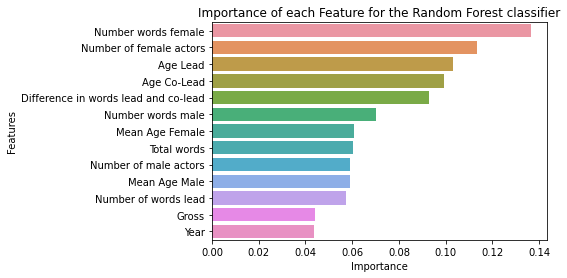

In [22]:
import seaborn as sns
feature_score = \
pd.Series(random_forest.feature_importances_, index=x_train.columns)\
.sort_values(ascending=False)
# 0(0), 2(10), 3(4), 6(1), 7(5), 8(11), 9(9), 10 (6), 11(2), 12(3)    
sns.barplot(x=feature_score, y=feature_score.index, )
plt.title("Importance of each Feature for the Random Forest classifier")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Tunning using the subset (0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)

In [49]:
from sklearn.ensemble import RandomForestClassifier
x_subset = data.iloc[:,[0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12]]
y_subset = data['Lead']

random_int = random.Random().randint(0, 99999)
x_subset_train, x_subset_test, y_subset_train, y_subset_test = \
train_test_split(x_subset, y_subset, random_state=random_int, shuffle = True, test_size=0.20)

ran_int = random.Random().randint(0, 99999)

# Create a model
rf_clf = RandomForestClassifier(max_depth=10, random_state=ran_int, bootstrap=True)

# Train the model
rf_clf.fit(x_subset_train, y_subset_train)

acc_rf_clf = rf_clf.score(x_subset_test, y_subset_test)
print(f'Score is {acc_rf_clf}')

# TODO: Check the cross fold
rf_cv_score = cross_val_score(rf_clf, x_subset, y_subset, cv=10)
print(f'Cross validation for random forest {rf_cv_score.mean()}')


Score is 0.8413461538461539
Cross validation for random forest 0.8518203883495146


### Tuning with a smaller subset (0, 3, 6, 11, 12)

In [45]:
x_small = data.iloc[:, [0, 3, 6, 7, 11, 12]]
y_small = data['Lead']

random_int = random.Random().randint(0, 99999)

x_small_train, x_small_test, y_small_train, y_small_test = \
train_test_split(x_small, y_small, random_state=random_int, shuffle=True, test_size=0.20)

# Create a model
ran_int = random.Random().randint(0, 99999)
rf_clf_small = RandomForestClassifier(max_depth=10, random_state=ran_int, bootstrap=True)

# Train th model
rf_clf_small.fit(x_small_train, y_small_train)

# Cross and validation
acc_rf_clf_small = rf_clf_small.score(x_small_test, y_small_test)
rf_small_cv_score = cross_val_score(rf_clf_small, x_small, y_small, cv=10)

print(f'Score is {acc_rf_clf_small}')
print(f'Cross validation is {rf_small_cv_score.mean()}')

Score is 0.8269230769230769
Cross validation is 0.831572068707991


In [52]:
# Feature importance for random forest
rf_param = {
    'n_estimators': [80, 90, 100, 110, 120],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 10, 1),
    'min_samples_split': range(1, 5, 1),
    'min_samples_leaf': range(2, 5, 1),
    'max_features': ['auto', 'log2']
}
grid_search = GridSearchCV(random_forest, rf_param)
grid_search.fit(x_subset, y_subset)
grid_search.best_params_



/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2400 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.9/site-packages/joblib/parallel.

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [56]:

random_int = random.Random().randint(0, 99999)
x_subset_train, x_subset_test, y_subset_train, y_subset_test = \
train_test_split(x_subset, y_subset, random_state=random_int, shuffle = True, test_size=0.20)

ran_int = random.Random().randint(0, 99999)

# Create a model
#rf_clf = RandomForestClassifier(max_depth=10, random_state=ran_int, bootstrap=True)
rf_grid = RandomForestClassifier(n_estimators=100, criterion='gini',
                                 max_depth=9, min_samples_split=2,
                                 min_samples_leaf = 4, max_features='auto',
                                 random_state=ran_int, bootstrap=True
                                )
# Train the model
rf_grid.fit(x_subset_train, y_subset_train)

acc_rf_clf = rf_grid.score(x_subset_test, y_subset_test)
print(f'Score is {acc_rf_clf}')

# TODO: Check the cross fold
rf_cv_score = cross_val_score(rf_grid, x_subset, y_subset, cv=10)
print(f'Cross validation for random forest {rf_cv_score.mean()}')

Score is 0.8028846153846154
Cross validation for random forest 0.8440907393577296


## Feature importance

In [64]:
count_lead = data['Lead'].value_counts()
print('Male=0, Female=1')
print(count_lead)

Male=0, Female=1
0    785
1    254
Name: Lead, dtype: int64


### Learn the model with all the features

 Acc mean 0.8331153846153851
Error rate 0.16688461538461538


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


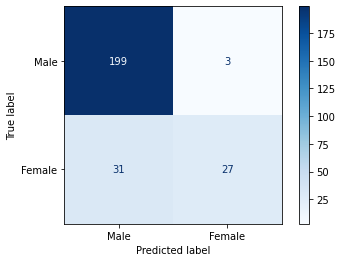

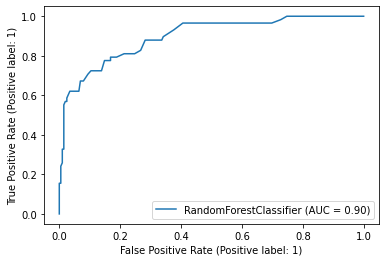

In [69]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay
sum_score = 0
err_sum = 0
x = data.drop(['Lead'], axis=1)
y = data['Lead']
loop_iter = 100

for i in range(loop_iter):

    x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25)

    # Create a model
    rf_clf= RandomForestClassifier()

    # Train th model
    rf_clf.fit(x_train, y_train)

    # Cross and validation
    acc_rf_clf = rf_clf.score(x_test, y_test)
    prediction = rf_clf.predict(x_test)
    #rf_cv = cross_val_score(rf_clf, x, y, cv=10)
    err = np.mean(prediction !=y_test)
    
    sum_score = sum_score + acc_rf_clf
    err_sum = err_sum + err
    
mean_sum = sum_score / loop_iter
err_mean = err_sum / loop_iter
print(f' Acc mean {mean_sum}')
print(f'Error rate {err_mean}')

conf_matrix = plot_confusion_matrix(rf_clf, x_test, y_test,
                            display_labels=['Male' ,'Female'],
                            cmap=plt.cm.Blues)
roc_rf = RocCurveDisplay.from_estimator(rf_clf, x_test, y_test)
plt.show()

### Droping words spoken by males and females

 Acc mean 0.7995769230769233
Error rate 0.20042307692307681


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


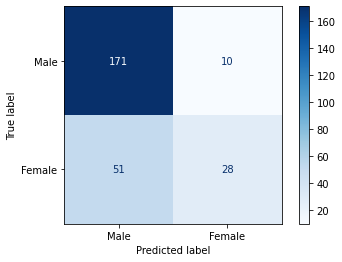

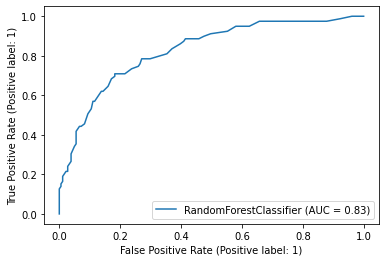

In [70]:
sum_score = 0
err_sum = 0
x = data.drop(['Number words female', 'Number words male', 'Lead'], axis=1)
y = data['Lead']
loop_iter = 100

for i in range(loop_iter):

    x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25)

    # Create a model
    rf_clf= RandomForestClassifier()

    # Train th model
    rf_clf.fit(x_train, y_train)

    # Cross and validation
    acc_rf_clf = rf_clf.score(x_test, y_test)
    prediction = rf_clf.predict(x_test)
    #rf_cv = cross_val_score(rf_clf, x, y, cv=10)
    err = np.mean(prediction !=y_test)
    
    sum_score = sum_score + acc_rf_clf
    err_sum = err_sum + err
    
mean_sum = sum_score / loop_iter
err_mean = err_sum / loop_iter
print(f' Acc mean {mean_sum}')
print(f'Error rate {err_mean}')

conf_matrix = plot_confusion_matrix(rf_clf, x_test, y_test,
                            display_labels=['Male' ,'Female'],
                            cmap=plt.cm.Blues)
roc_rf = RocCurveDisplay.from_estimator(rf_clf, x_test, y_test)
plt.show()

### Droping year of release

 Acc mean 0.8389615384615383
Error rate 0.16103846153846157


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


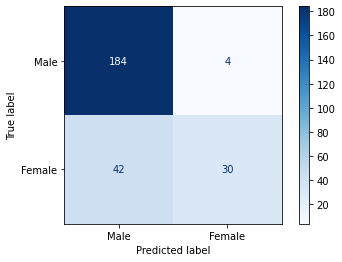

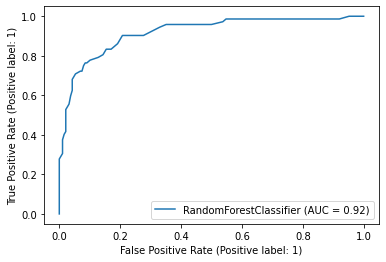

In [71]:
sum_score = 0
err_sum = 0
x = data.drop(['Year','Lead'], axis=1)
y = data['Lead']
loop_iter = 100

for i in range(loop_iter):

    x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25)

    # Create a model
    rf_clf= RandomForestClassifier()

    # Train th model
    rf_clf.fit(x_train, y_train)

    # Cross and validation
    acc_rf_clf = rf_clf.score(x_test, y_test)
    prediction = rf_clf.predict(x_test)
    #rf_cv = cross_val_score(rf_clf, x, y, cv=10)
    err = np.mean(prediction !=y_test)
    
    sum_score = sum_score + acc_rf_clf
    err_sum = err_sum + err
    
mean_sum = sum_score / loop_iter
err_mean = err_sum / loop_iter
print(f' Acc mean {mean_sum}')
print(f'Error rate {err_mean}')
conf_matrix = plot_confusion_matrix(rf_clf, x_test, y_test,
                            display_labels=['Male' ,'Female'],
                            cmap=plt.cm.Blues)
roc_rf = RocCurveDisplay.from_estimator(rf_clf, x_test, y_test)
plt.show()

### Droping gross feature

 Acc mean 0.8416538461538462
Error rate 0.15834615384615383


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


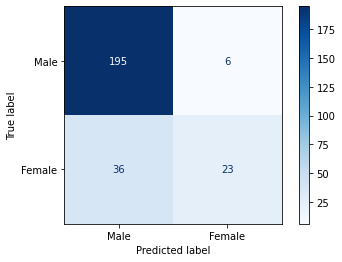

In [67]:
sum_score = 0
err_sum = 0
x = data.drop(['Gross', 'Lead'], axis=1)
y = data['Lead']
loop_iter = 100

for i in range(loop_iter):

    x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25)

    # Create a model
    rf_clf= RandomForestClassifier()

    # Train th model
    rf_clf.fit(x_train, y_train)

    # Cross and validation
    acc_rf_clf = rf_clf.score(x_test, y_test)
    prediction = rf_clf.predict(x_test)
    #rf_cv = cross_val_score(rf_clf, x, y, cv=10)
    err = np.mean(prediction !=y_test)
    
    sum_score = sum_score + acc_rf_clf
    err_sum = err_sum + err
    
mean_sum = sum_score / loop_iter
err_mean = err_sum / loop_iter
print(f' Acc mean {mean_sum}')
print(f'Error rate {err_mean}')
conf_matrix = plot_confusion_matrix(rf_clf, x_test, y_test,
                            display_labels=['Male' ,'Female'],
                            cmap=plt.cm.Blues)
roc_rf = RocCurveDisplay.from_estimator(rf_clf, x_test, y_test)
plt.show()

### Droping year and gross

 Acc mean 0.8438461538461541


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


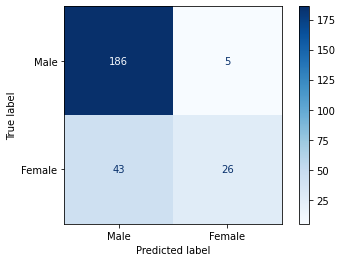

In [68]:
sum_score = 0
err_sum = 0
x = data.drop(['Year', 'Gross', 'Lead'], axis=1)
y = data['Lead']
loop_iter = 100

for i in range(loop_iter):
    
    random_int = random.Random().randint(0, 99999)

    x_train, x_test, y_train, y_test = \
    train_test_split(x, y, random_state=random_int, shuffle=True, test_size=0.25)

    # Create a model
    ran_int = random.Random().randint(0, 99999)
    rf_clf= RandomForestClassifier()

    # Train th model
    rf_clf.fit(x_train, y_train)

    # Cross and validation
    acc_rf_clf = rf_clf.score(x_test, y_test)
    #rf_cv = cross_val_score(rf_clf, x, y, cv=10)
    
    sum_score = sum_score + acc_rf_clf
    
mean_sum = sum_score / loop_iter
print(f' Acc mean {mean_sum}')
conf_matrix = plot_confusion_matrix(rf_clf, x_test, y_test,
                            display_labels=['Male' ,'Female'],
                            cmap=plt.cm.Blues)
plt.show()